In [14]:
# %load kegg_parserer_ko2_KO_counts.py
#Parses the KEG htext file format

# from argparse import ArgumentParser
import re
import sys
import os
import csv
import pandas as pd
import numpy as np



In [250]:
ko2Tab=pd.read_table('ko00002_table.tab', index_col='KeggID')
All_KO_Counts=pd.read_table('AllPhytoKegg_KO_counts.tab', index_col='gID')

In [251]:
All_KO_Counts

,S1,S2,S3,S4,S5
gID,,,,,
K01369,0.247354,0.341666,0.460501,0.133126,0.200836
K01365,68.899372,496.723464,52.497157,86.345446,78.593969
K01366,1.180554,1.203260,1.346081,1.144883,0.981867
K01360,0.168651,0.178261,0.330616,0.319502,0.513249
K01363,1.439151,3.000722,2.196237,1.491010,3.570424
K01362,107.992570,67.293417,79.843855,87.170827,228.127808
K08568,45.996627,143.440450,63.017843,126.070209,74.443350
K08569,0.000000,0.014855,0.011808,0.026625,0.000000
K05841,0.281084,0.148551,0.814733,0.905256,0.557879


In [66]:
from matplotlib import pyplot as plt
from matplotlib import gridspec
from itertools import combinations
import palettable.colorbrewer as b2m
import palettable as pal
import glob
from Bio import SeqIO
from string import ascii_lowercase, ascii_uppercase
from matplotlib.colors import LogNorm, NoNorm
%matplotlib inline
def HeatMap(All_insitu_Percent, columns=None,colormap=b2m.sequential.YlOrRd_9.get_mpl_colormap(), m=1e-5):
    if columns:
        All_insitu_Percent=All_insitu_Percent[columns]
    # sckos=['SS1','SS2','SS3', 'SS4', 'SS5']
    All_insitu_Percent['mean']=All_insitu_Percent.mean(skipna=1, axis=1) #calculate mean value for each class

    All_insitu_Percent=All_insitu_Percent.sort(columns='mean', ascending=False)#Sort by the mean value

    All_insitu_Percent=All_insitu_Percent.drop('mean',1) #drop mean column
    All_insitu_Percent=All_insitu_Percent.loc[All_insitu_Percent.sum(axis=1)!=0]

    col_labels=list(All_insitu_Percent.index)
    row_labels=list(All_insitu_Percent.columns.values)
    fig3,ax3=plt.subplots()
    fig3.set_figheight(len(col_labels)/300)
    fig3.set_figwidth(len(row_labels))
    heatmap3 = ax3.pcolor(All_insitu_Percent, cmap=colormap, norm=LogNorm(vmin=m, vmax=All_insitu_Percent.max().max()))
    #heatmap3 = ax3.pcolor(All_insitu_Percent, cmap=plt.cm.jet, vmin=0, vmax=.25)
    ax3.set_xticks(np.arange(All_insitu_Percent.shape[1])+0.5, minor=False)
    ax3.set_yticks(np.arange(All_insitu_Percent.shape[0])+0.5, minor=False)
    ax3.invert_yaxis()
    ax3.xaxis.tick_top()
    ax3.margins(0,0)

    ax3.set_xticklabels(row_labels, minor=False)
    ax3.set_yticklabels(col_labels, minor=False)
    plt.colorbar(heatmap3)
    plt.show()
    return fig3


KeyboardInterrupt: 

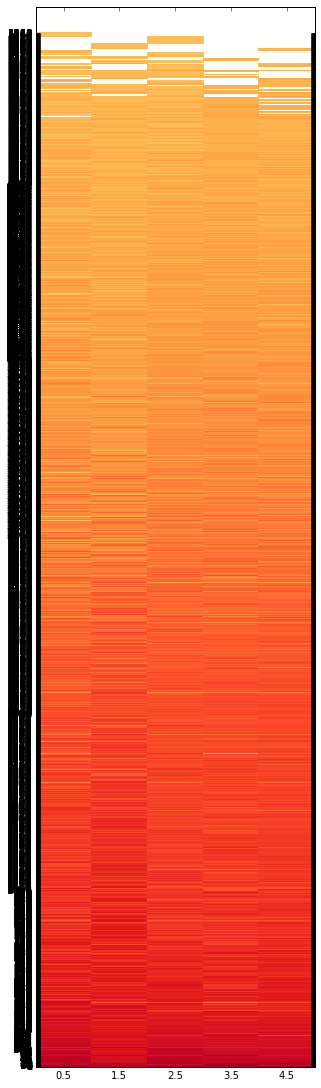

In [77]:
HeatMap(All_KO_Counts)

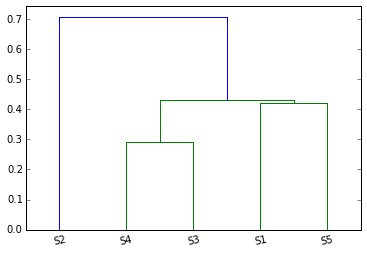

In [76]:
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as dist
import matplotlib.pylab as pylab

inDF=All_KO_Counts
distMatrix=dist.pdist(inDF.T, 'Correlation')
distSqMatrix = dist.squareform(distMatrix)
linkageMatrix=sch.linkage(distSqMatrix) 
dendro = sch.dendrogram(linkageMatrix)
leaves = dendro['leaves'] 
dendro = sch.dendrogram(linkageMatrix, labels=inDF.columns[leaves])


Genes associated with **C00353**: 
- K10960 
- K02291  phytoene synthase [EC:2.5.1.32] : in index-- similar pattern to compound abundance? High TPM **Interesting compound**
- K09833  homogentisate phytyltransferase / homogentisate geranylgeranyltransferase [EC:2.5.1.115 2.5.1.116] Not much of a pattern ; low tpm
- K00804  geranylgeranyl diphosphate synthase, type III [EC:2.5.1.1 2.5.1.10 2.5.1.29]
- K13787  geranylgeranyl diphosphate synthase, type I [EC:2.5.1.1 2.5.1.10 2.5.1.29]
- K13789  geranylgeranyl diphosphate synthase, type II [EC:2.5.1.1 2.5.1.10 2.5.1.29]

Not annotated in the transcriptome: 
- K17841  15-cis-phytoene synthase / lycopene beta-cyclase [EC:2.5.1.32 5.5.1.19]
- K12921  taxadiene synthase [EC:4.2.3.17]
- K18385  geranylgeranyldiphosphate transferase

In [129]:
def plotKOByTime(kid, ax=None):
    if kid in All_KO_Counts.index:
        y=All_KO_Counts.loc[kid]
        if ax==None:
            ax=plt.subplot()

        
        ax.plot(np.arange(5),y[0:5])
        ax.set_title(kid)
        plt.show()
        ax.plot(np.arange(5),y[0:5])
        ax.set_title(kid)
    else:
        print kid + ' is not in the index'
    

K18385 is not in the index


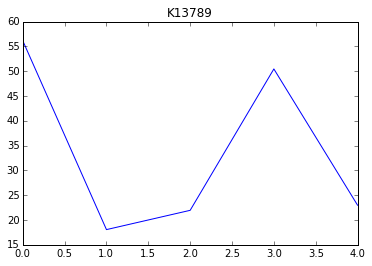

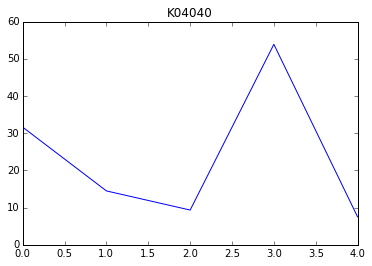

In [138]:
plotKOByTime('K18385')
plotKOByTime('K13789')
plotKOByTime('K04040')

In [96]:
kid='K02291'
All_KO_Counts.loc[kid]


S1      43.579303
S2      44.669163
S3      18.538132
S4      24.974415
S5      12.942789
mean    28.940760
Name: K02291, dtype: float64

In [252]:

def getROData(RO):
    #get the KO/CO data associated with a reaction
    RO_httpstr='http://www.genome.jp/dbget-bin/www_bget?rn:'
    ROsite=urllib2.urlopen(RO_httpstr+RO)
    Rsoup=BeautifulSoup(ROsite)
    Rtable=Rsoup.table
    KOlist=Rtable.findAll(text=re.compile('K[0-9]{,5}$'))
    COlist=Rtable.findAll(text=re.compile('^C[0-9]{,5}$'))
    return KOlist, COlist
    
def getKOfromCO(COid):
    #Function to find and locate pertenant information about the CO (compound) ids
    #Get the website that we want by adding this string to the input
    CO_httpstr='http://www.genome.jp/dbget-bin/www_bget?cpd:'
    CO_httpfull=CO_httpstr+COid
    COsite=urllib2.urlopen(CO_httpfull)
    #Use beautiful soup to parse the website
    Csoup = BeautifulSoup(COsite)
    #Identify the table on the website
    COtable=Csoup.table
    #Find all of the reaction numbers
    ReactionNums=COtable.findAll(text=re.compile('^R[0-9]{,6}$'))
    ModuleNums=COtable.findAll(text=re.compile('^M[0-9]{,6}$'))
    #Open reaction and identify the KO numbers
    ReactionDict={}
    
    for RO in ReactionNums:
        KOlist,COlist=getROData(RO)
        rx={}
        rx['KO']=KOlist
        rx['CO']=COlist
        ReactionDict[RO]=rx
    KO=[v['KO'] for v in ReactionDict.itervalues()]
    CO=[v['CO'] for v in ReactionDict.itervalues()]
    KO_Set=list(set([item for sublist in KO for item in sublist]))
    CO_Set=list(set([item for sublist in CO for item in sublist]))
    return ReactionDict, KO_Set, CO_Set,  ModuleNums




In [253]:
ReactionDict, KO_Set, CO_Set,  ModuleNums=getKOfromCO('C00353')

In [256]:
CO_RawData=pd.read_csv('cpds_forPathview.csv', index_col='names')
KO_RawData=pd.read_csv('AllPhytoKegg_KO_counts.tab', index_col='gID', delimiter='\t')

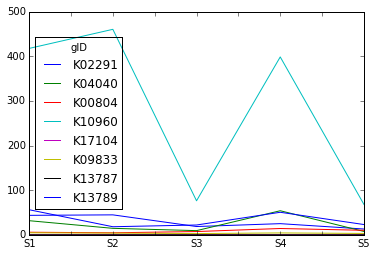

In [287]:
linePlot=KO_RawData.loc[KO_Set].dropna().T.plot(grid=False)
# linePlot.axes.set_ylim([0,100])

In [288]:
ReactionDict, KO_Set, CO_Set,  ModuleNums=getKOfromCO('C00341')

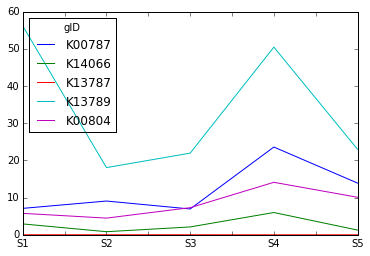

In [289]:
linePlot=KO_RawData.loc[KO_Set].dropna().T.plot(grid=False)


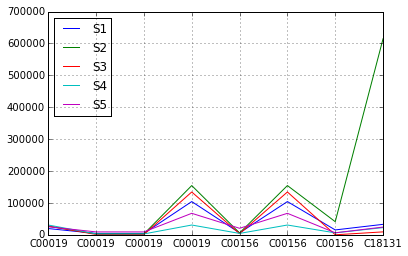

In [295]:
CO_RawData.loc[CO_Set,['S1','S2','S3','S4', 'S5']].dropna().plot()


In [296]:
CO_RawData['C00341']

KeyError: 'C00341'